<a href="https://www.kaggle.com/code/houssemaminetouihri/l2-regularization?scriptVersionId=105880148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**In this notebook, i'm going to explain L2 regularization and show an example of CNN model being regularized** 

In [1]:
        # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras as ks
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# L2 Regularization (for a CNN example)
##### also called simply “weight decay"


**If you suspect your neural network is overfitting your data, 
that is, you have a high variance problem, one of the first things you should try is probably regularization.**  

In L2, we have:
  
![L2](https://i.ibb.co/b3Dp6mL/L2.png) it comes **to adding a cost** to the loss function for large weights

Here, **lambda** is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).  
**By default, no regularizer is used in any layers.**


A weight regularizer can be added to each layer when the layer is defined in a Keras model.  
**A weight regularizer can be added to each layer when the layer is defined in a Keras model.**

This is achieved by setting the kernel_regularizer argument on each layer. A separate regularizer can also be used for the bias via the bias_regularizer argument, although this is less often used.

Let’s look at some examples.

#### Weight Regularization for Dense Layers

In [2]:
## example of l2 on a dense layer
##from keras.layers import Dense
##from keras.regularizers import l2

##model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


kernel_regularizer: Regularizer to apply a penalty on the layer's kernel  
bias_regularizer: Regularizer to apply a penalty on the layer's bias

#### Weight Regularization for Convolutional Layers


Like the Dense layer, the Convolutional layers (e.g. Conv1D and Conv2D) also use the kernel_regularizer and bias_regularizer arguments to define a regularizer.

In [3]:
# example of l2 on a convolutional layer
#from keras.layers import Conv2D
#from keras.regularizers import l2

#model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

#### Weight Regularization for Recurrent Layers

Example for Recccurrent Layers :   
LSTM layer  
GRU layer  
SimpleRNN layer  
TimeDistributed layer  
Bidirectional layer  
ConvLSTM1D layer  
ConvLSTM2D layer  
ConvLSTM3D layer  
Base RNN layer


Recurrent layers like the LSTM offer more flexibility in regularizing the weights.

The input, recurrent, and bias weights can all be regularized separately via the kernel_regularizer, recurrent_regularizer, and bias_regularizer arguments.

The example below sets an l2 regularizer on an LSTM recurrent layer:

In [4]:
# example of l2 on an lstm layer
#from keras.layers import LSTM
#from keras.regularizers import l2
#model.add(LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

#### Which layers should i add L2 regularization ?

it seems to be an convention to add L2 regularization for each layer, as long as you didn’t set a too large weight for that.

To increase the regularization of a model(=the effect of the L_2 penalization) one of the actions that you can do **is increasing the value of the hyperparameter.**

### Example

to be added on the dropout part ::  
Typically there is no need to to add dropout for every layer. In most of the popular CNN structure, you may only add dropout at each (or only the last) full connected layer.

Adding too much dropout for regularization will severely slow down the convergence rate, and change over-fitting to under-fitting.

In [5]:
model0 = ks.models.Sequential()
model0.add(ks.layers.Dense(4, input_shape=(64, 64, 1))) #units=4(we define how many outputs we want)
model0.add(ks.layers.Dense(8, input_shape=(64, 64, 1)))
model0.add(ks.layers.Dense(8, input_shape=(64, 64, 1)))
model0.add(ks.layers.Conv2D(64,(3, 3), activation='relu')) 
       
model0.add(ks.layers.MaxPooling2D(pool_size=2, strides=2))
model0.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(ks.layers.MaxPooling2D(2, 2)) 
       
model0.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
model0.add(ks.layers.MaxPooling2D(2, 2))
model0.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
model0.add(ks.layers.MaxPooling2D(2, 2))
model0.add(ks.layers.Dropout(0.2))
model0.add(ks.layers.Flatten())

model0.add(ks.layers.Dense(1024, activation='relu'))
model0.add(ks.layers.Dense(10, activation='softmax'))

model0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


2022-09-17 10:46:01.016402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 10:46:01.126034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 10:46:01.126831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 10:46:01.128697: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
#This is more explained on my notebook: https://www.kaggle.com/code/houssemaminetouihri/implementation-of-cnn-s-models-and-comparison-betw#Importing-necessary-libraries
#Reading the data
train=pd.read_csv("../input/sign-recognition/Train.csv")
test=pd.read_csv("../input/sign-recognition/Test.csv")
#Drop ID column and define train_y , train_x , test_x
train_y=train['Target'].astype('float32')
train_x=train.drop(['Target','ID'],axis=1).astype('int32')
test_x=test.drop(['ID'],axis=1).astype('int32')
#One Hot Encoding for train_y
train_y=ks.utils.to_categorical(train_y,10)
#Reshape the size of images and normalize them
train_x=train_x.values.reshape(-1,64,64,1) #.values return an array #-1:to convert it to 1-D 
train_x=train_x/255.0
test_x=test_x.values.reshape(-1,64,64,1)
test_x/255.0
#split
x_train , x_test, y_train , y_test=train_test_split(train_x, train_y , test_size=0.15)
#Generating new images
datagenerator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
train_generator = datagenerator.flow(x_train,y_train,)
validation_generator = datagenerator.flow(x_test, y_test)
model0.compile(optimizer=ks.optimizers.Adam(),loss='categorical_crossentropy',metrics=['acc'])
class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.85) and (logs.get('val_acc')>0.85):
            print('\n reached 84% accuarcy so stopping training')
            self.model.stop_training = True

In [7]:
callbacks = myCallback()
batch_size=5
FAST_RUN = False
epochs=20 if FAST_RUN else 100
history = model0.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        ks.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
)


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-17 10:46:11.847687: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-17 10:46:14.616777: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


133/133 [==============================] - 11s 25ms/step - loss: 2.0222 - acc: 0.2322 - val_loss: 1.2978 - val_acc: 0.4627
Epoch 2/100
133/133 [==============================] - 3s 22ms/step - loss: 1.0668 - acc: 0.5645 - val_loss: 0.8284 - val_acc: 0.6773
Epoch 3/100
133/133 [==============================] - 3s 22ms/step - loss: 0.7431 - acc: 0.7035 - val_loss: 0.6711 - val_acc: 0.7253
Epoch 4/100
133/133 [==============================] - 3s 22ms/step - loss: 0.6358 - acc: 0.7475 - val_loss: 0.6041 - val_acc: 0.7707
Epoch 5/100
133/133 [==============================] - 3s 22ms/step - loss: 0.5685 - acc: 0.7755 - val_loss: 0.5727 - val_acc: 0.8000
Epoch 6/100
133/133 [==============================] - 3s 23ms/step - loss: 0.5511 - acc: 0.7847 - val_loss: 0.5467 - val_acc: 0.8000
Epoch 7/100
133/133 [==============================] - 4s 28ms/step - loss: 0.5514 - acc: 0.7880 - val_loss: 0.5572 - val_acc: 0.8013
Epoch 8/100
133/133 [==============================] - 3s 22ms/step - los

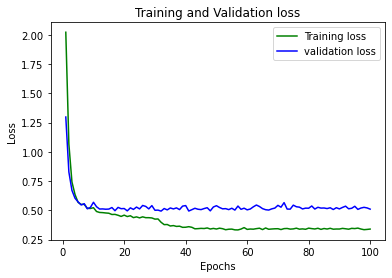

In [8]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model0_regularized = ks.models.Sequential()
model0_regularized.add(ks.layers.Dense(4, input_shape=(64, 64, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #units=4(we define how many outputs we want)
model0_regularized.add(ks.layers.Dense(8, input_shape=(64, 64, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model0_regularized.add(ks.layers.Dense(8, input_shape=(64, 64, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model0_regularized.add(ks.layers.Conv2D(64,(3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 

model0_regularized.add(ks.layers.MaxPooling2D(pool_size=2, strides=2))
model0_regularized.add(ks.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model0_regularized.add(ks.layers.MaxPooling2D((2, 2))) 
       
model0_regularized.add(ks.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model0_regularized.add(ks.layers.MaxPooling2D(2, 2))
model0_regularized.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
model0_regularized.add(ks.layers.MaxPooling2D(2, 2))
model0_regularized.add(ks.layers.Dropout(0.2))
model0_regularized.add(ks.layers.Flatten())

model0_regularized.add(ks.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01) , bias_regularizer=l2(0.01)))
model0_regularized.add(ks.layers.Dense(10, activation='softmax', kernel_regularizer=l2(0.01) ,  bias_regularizer=l2(0.01)))
#i'm not sure about flatten maxpooling2d

model0_regularized.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
                      # max pooling error for L2 regularization


In [10]:
model0_regularized.compile(optimizer=ks.optimizers.Adam(),loss='categorical_crossentropy',metrics=['acc'])

In [11]:
callbacks = myCallback()
batch_size=5
FAST_RUN = False
epochs=20 if FAST_RUN else 100
history = model0_regularized.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        ks.callbacks.ReduceLROnPlateau()
    ]
)


Epoch 1/100
133/133 [==============================] - 4s 25ms/step - loss: 4.0792 - acc: 0.1087 - val_loss: 2.3920 - val_acc: 0.1147
Epoch 2/100
133/133 [==============================] - 3s 23ms/step - loss: 2.3673 - acc: 0.1134 - val_loss: 2.3497 - val_acc: 0.1147
Epoch 3/100
133/133 [==============================] - 4s 30ms/step - loss: 2.3367 - acc: 0.1134 - val_loss: 2.3280 - val_acc: 0.1147
Epoch 4/100
133/133 [==============================] - 3s 23ms/step - loss: 2.3200 - acc: 0.1134 - val_loss: 2.3160 - val_acc: 0.1147
Epoch 5/100
133/133 [==============================] - 3s 22ms/step - loss: 2.3107 - acc: 0.1134 - val_loss: 2.3095 - val_acc: 0.1147
Epoch 6/100
133/133 [==============================] - 3s 25ms/step - loss: 2.3057 - acc: 0.1134 - val_loss: 2.3060 - val_acc: 0.1147
Epoch 7/100
133/133 [==============================] - 3s 23ms/step - loss: 2.3031 - acc: 0.1134 - val_loss: 2.3044 - val_acc: 0.1147
Epoch 8/100
133/133 [==============================] - 3s 22ms

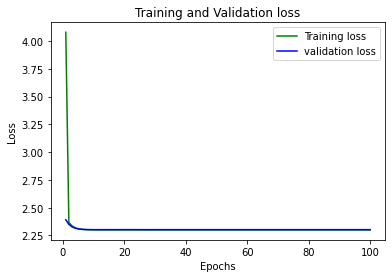

In [12]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can wsee the validation loss has decreased :)

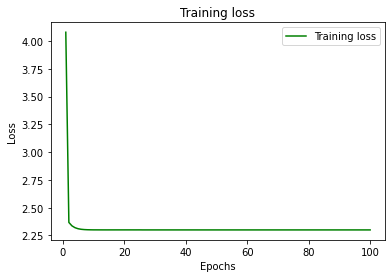

In [13]:
loss_train = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# L2 Regularization (for Machine learning)

A regression model that uses **L1 regularization** technique is called **Lasso Regression** and model which uses **L2** is called **Ridge Regression.**  
The key difference between these two is the penalty term.
Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques are a great alternative when we are dealing with **a large set of features.**





If you have studied the concept of regularization in machine learning, you will have a fair idea that regularization penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.

Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero. This will result in a much simpler linear network and slight underfitting of the training data.

Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below.  

**Variables standardization** is the initial procedure in ridge regression. Both the independent and dependent variables require standardization through subtraction of their averages and a division of the result with the standard deviations. It is common practice to annotate in a formula whether the variables therein are standardized or not.

regularizing lamba part is in progress ...

To find optimum alpha for Ridge Regularization we can be applying GridSearchCV